In [1]:
import numpy as np
import pandas as pd

##  **1) READ DATASET**

In [2]:
df= pd.read_csv("Advertising.csv")

In [3]:
df.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


##  **2) DATASET ANALYSIS**

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [7]:
# Get size of dataset
df.size

1000

In [8]:
# Get (rows,columns)
df.shape

(200, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
#Get number of duplicate rows
df.duplicated().sum()

0

In [11]:
# Get number of null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
#Get statistical summary of dataset(numeric values)
df.describe().round(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.022
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


### Conclusion about the dataset 


* The dataset contains advertising spending across TV, Radio, Newspaper and the corresponding sales. 
* There are 200 rows and 5 columns in the data.
* Column names : 'Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'
* No duplicate rows present in dataset.
* No Null values present in dataset.

## **3) DATA TRANSFORMATION**

In [13]:
# Removing the 'Unnamed: 0' column as it's of no use
df=df.drop(['Unnamed: 0'], axis=1)

In [14]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## **4) DATA VISUALIZATION**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

####  3.1 - Boxplot

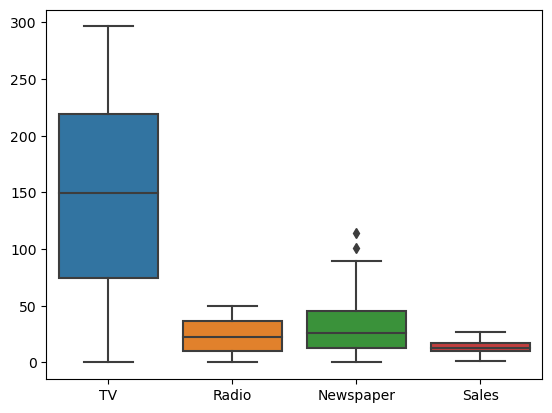

In [16]:
# Boxplot to see outliers
sns.boxplot(df)
plt.show()

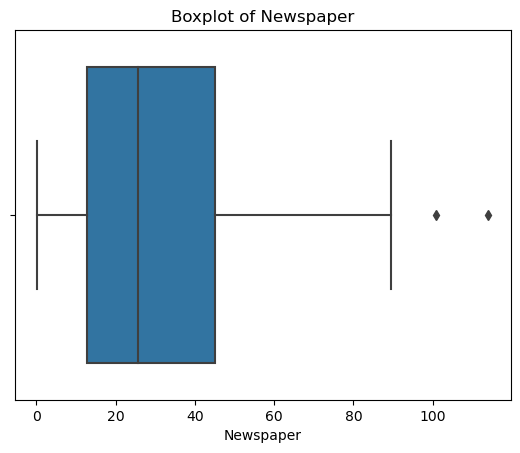

In [17]:
sns.boxplot(x=df['Newspaper'])
plt.title('Boxplot of Newspaper')
plt.show()


**Findings:** As we can see there are outliers in 'Newspaper' so we'll remove them

In [18]:
#Removing outliers
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# outliers
outliers = df[(df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)]
print(outliers)

df_clean = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


In [19]:
df_clean

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [20]:
df_clean.shape

(198, 4)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


#### 3.2 - Correlation Heatmap

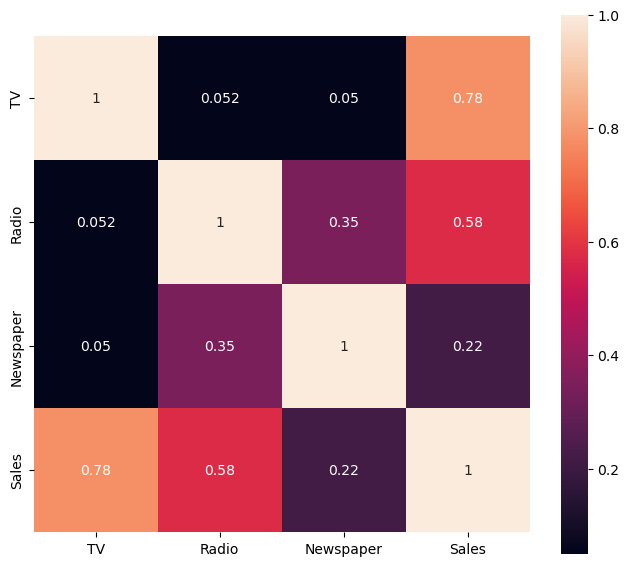

In [22]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

corrmat = df_clean.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corrmat,annot=True , square=True)
plt.show()

#### Insights/conclusion form corelation chart

* TV and Radio have stronger correlations with Sales (0.779 , 0.577) compared to Newspaper (0.220).

* so for the training of model TV and Radio will be important features as they have significant impact on Sales.


#### 3.3 - Relationship between each independent variable and the dependent variable

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


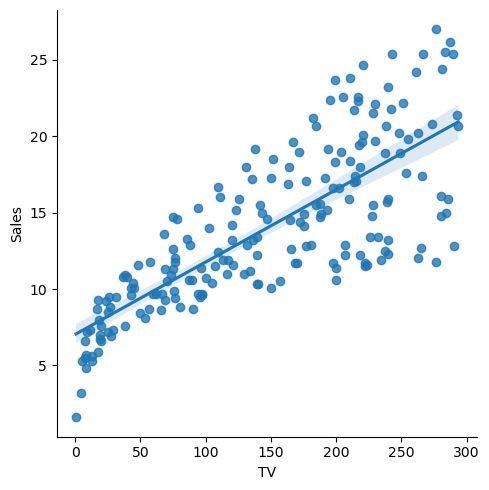

In [23]:
# tv vs sales
sns.lmplot(x='TV', y='Sales', data=df_clean)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


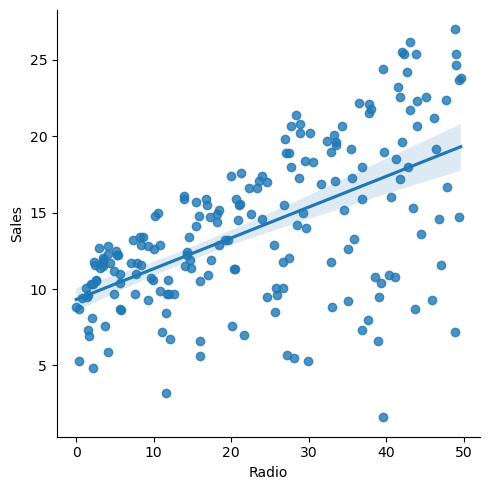

In [24]:
# radio vs sales 
sns.lmplot(x='Radio', y='Sales', data=df_clean)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


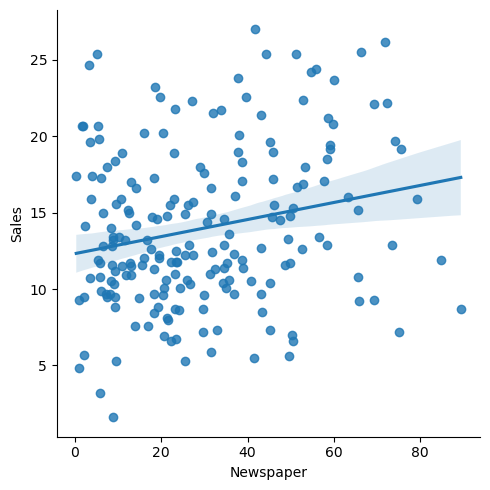

In [25]:
# newspaper vs sales 
sns.lmplot(x='Newspaper',y= 'Sales', data=df_clean)

 ## **4) ML MODEL TRAINING**

In [26]:
# with tv radio and newspaper
x = df_clean[['TV','Radio','Newspaper']]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [27]:
# Target
y=df_clean['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Splitting The Data Into Test And Train Data

In [28]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test  = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
import pandas as pd
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

## Model-1 Linear Regression

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train , y_train )

y_pred  = LR .predict(X_test )
y_pred

array([14.01074388,  7.32660883, 16.91029923, 12.10494494, 10.32680801,
       15.800589  , 12.86917345, 14.46182171, 10.88622651, 16.12070585,
       22.89188978,  4.44772138, 14.47452338, 15.16779294, 13.08219004,
       11.93756336,  7.38163825, 11.34017618,  9.97074394, 17.25257133,
       20.92597453,  9.48506413,  8.89608111, 12.37384205,  9.35819552,
       16.12716079, 12.20096627, 20.59655504, 21.36951517, 15.07208869,
       23.2153892 , 20.87809592,  9.72208672, 24.06696712, 16.36688684,
        7.97869287, 21.91262979, 13.29393385, 11.82322424,  9.07954633])

In [31]:
print('intercept: ',LR.intercept_)
print('coefficients: ',LR.coef_)

intercept:  2.78119755177158
coefficients:  [0.0448192  0.18851633 0.00639467]


In [32]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,14.010744
1,8.4,7.326609
2,18.0,16.910299
3,11.7,12.104945
4,8.8,10.326808
5,16.0,15.800589
6,7.2,12.869173
7,15.5,14.461822
8,9.2,10.886227
9,16.6,16.120706


In [33]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score = pd.DataFrame(index = ['MAE', 'MSE', 'RMSE',  'R2'])
score['LR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales')

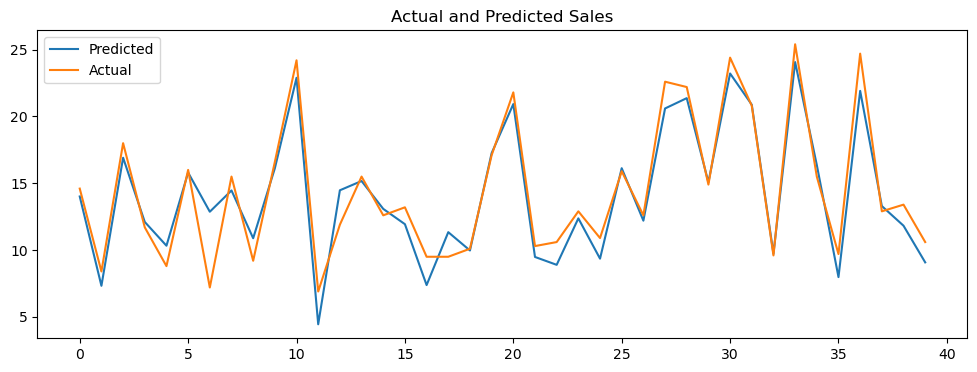

In [34]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales', fontsize=12)

In [35]:
score

,LR
MAE,1.177153
MSE,2.432077
RMSE,1.559512
R2,0.909895


## Model-2 Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor

DTR  = DecisionTreeRegressor()
DTR.fit(X_train , y_train )

y_pred  = DTR.predict(X_test )
y_pred

array([16.6,  9.7, 15.2, 12.9,  8. , 15.3,  6.6, 15. ,  8.7, 16.6, 25.4,
        7.3, 12.3, 15.6, 14.7, 11.9,  9.6,  8. , 10.4, 19.4, 22.1, 10.3,
        9.7, 11.9, 10.5, 15.2, 14.4, 21.7, 22.1, 16.6, 22.1, 19.7, 10.1,
       25.5, 14.8,  9.7, 23.7, 14.4, 12.2,  9.7])

In [37]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,16.6
1,8.4,9.7
2,18.0,15.2
3,11.7,12.9
4,8.8,8.0
5,16.0,15.3
6,7.2,6.6
7,15.5,15.0
8,9.2,8.7
9,16.6,16.6


In [38]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score['DTR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales (DecisionTreeRegressor)')

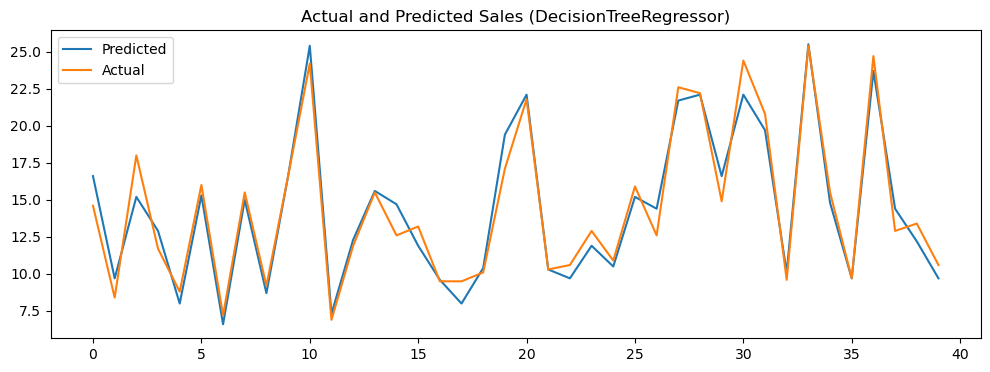

In [39]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales (DecisionTreeRegressor)', fontsize=12)

In [40]:
score

,LR,DTR
MAE,1.177153,0.930000
MSE,2.432077,1.368000
RMSE,1.559512,1.169615
R2,0.909895,0.949317


## Model-3 Random Forest Regressor

In [41]:
# Train the model
from sklearn.ensemble import RandomForestRegressor

RFR  = RandomForestRegressor()
RFR.fit(X_train , y_train )

y_pred  = RFR.predict(X_test )
y_pred

array([15.519,  9.231, 17.002, 12.609,  8.249, 15.286,  7.005, 15.393,
        8.403, 16.949, 25.174,  7.322, 12.14 , 15.393, 13.214, 12.609,
        9.405,  8.052, 10.338, 17.493, 22.159, 10.438,  9.953, 12.797,
       11.092, 15.817, 14.014, 22.347, 20.89 , 16.256, 22.936, 20.392,
       10.199, 25.158, 15.188,  9.439, 23.131, 14.132, 12.684,  9.913])

In [42]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,15.519
1,8.4,9.231
2,18.0,17.002
3,11.7,12.609
4,8.8,8.249
5,16.0,15.286
6,7.2,7.005
7,15.5,15.393
8,9.2,8.403
9,16.6,16.949


In [43]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score['RFR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales (RandomForestRegressor)')

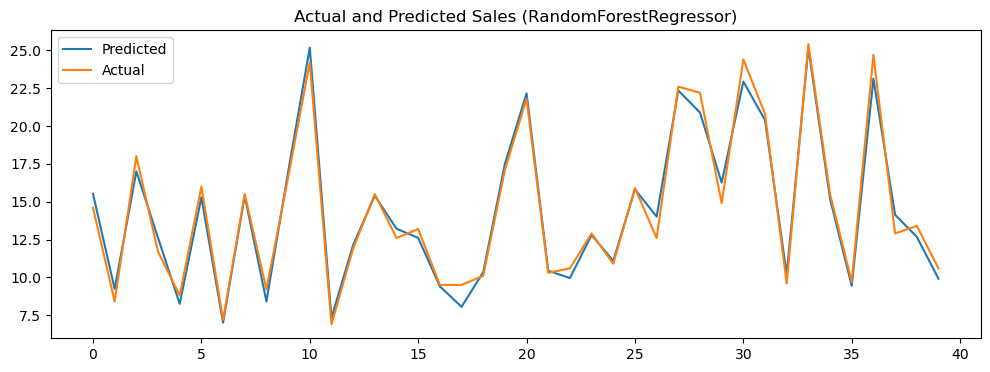

In [44]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales (RandomForestRegressor)', fontsize=12)

In [45]:
score

,LR,DTR,RFR
MAE,1.177153,0.930000,0.620925
MSE,2.432077,1.368000,0.582803
RMSE,1.559512,1.169615,0.763416
R2,0.909895,0.949317,0.978408


## Model-4 Support Vector Regressor

In [46]:
# Train the model
from sklearn.svm import SVR

SVR  = SVR()
SVR.fit(X_train , y_train )

y_pred  = SVR.predict(X_test )
y_pred

array([14.63187601,  8.65150457, 16.24395389, 13.89024124,  8.73308591,
       15.35185943,  9.1943873 , 15.32738951,  9.15009018, 16.2105523 ,
       19.82269093,  7.13274544, 15.90651796, 15.74635929, 12.35141978,
       12.79097969,  9.90280999,  9.03859644,  9.37691197, 17.67052203,
       18.98369233, 11.56122342, 10.77042121, 13.66024786, 10.23539531,
       16.09529915, 13.57038657, 19.14750132, 19.35953536, 15.85319656,
       19.175568  , 18.44067661,  9.21430003, 19.13072139, 16.48080036,
       10.15319025, 19.24689969, 15.1597682 , 12.98456411, 10.65746918])

In [47]:
# actual and predicted valus
act_pred = pd.DataFrame({'Actual':y_test.values.flatten(), 'Predict':y_pred.flatten()})
act_pred

,Actual,Predict
0,14.6,14.631876
1,8.4,8.651505
2,18.0,16.243954
3,11.7,13.890241
4,8.8,8.733086
5,16.0,15.351859
6,7.2,9.194387
7,15.5,15.327390
8,9.2,9.150090
9,16.6,16.210552


In [48]:
# Model Evaluation 
mae  = mean_absolute_error(y_test , y_pred )
mse  = mean_squared_error(y_test , y_pred )
rmse  = mse  ** 0.5
r2  = r2_score(y_test , y_pred )

evaluation= [mae,mse,rmse,r2]
score['SVR'] = evaluation

Text(0.5, 1.0, 'Actual and Predicted Sales (SVR)')

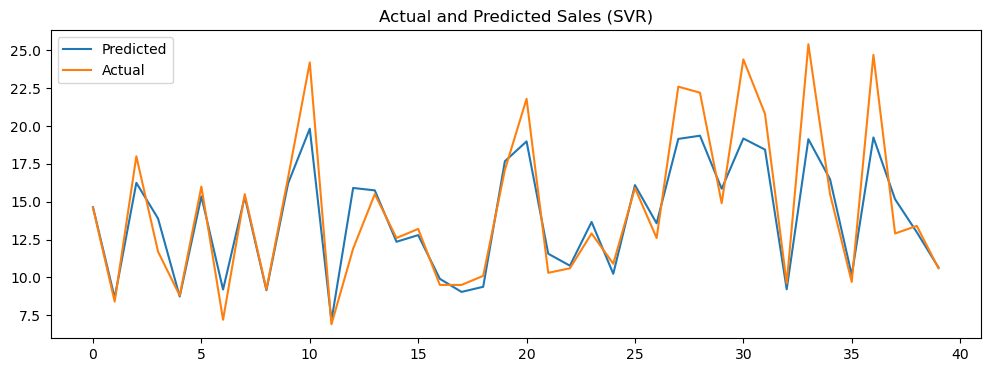

In [49]:
# Plot of actual and predicted values

plt.figure(figsize=(12,4))
plt.plot((y_pred))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Sales (SVR)', fontsize=12)

In [50]:
score

,LR,DTR,RFR,SVR
MAE,1.177153,0.930000,0.620925,1.429315
MSE,2.432077,1.368000,0.582803,4.756472
RMSE,1.559512,1.169615,0.763416,2.180934
R2,0.909895,0.949317,0.978408,0.823779


# Conclusion

* In this task, I have used the Advertising Dataset to predict sales based on TV, Radio, and Newspaper advertising budgets.

* I performed an analysis and visualization of the dataset to understand the relationships between features and identify outliers.

* I trained several models: Linear Regression, Decision Tree Regressor, Random Forest Regressor, and Support Vector Regressor (SVR).

* The Random Forest Regressor achieved the best performance with an R-squared value of 0.978260, indicating very high accuracy.

* I created a dataframe of actual and predicted values for each model to demonstrate their effectiveness.

* Finally, I visualized the actual and predicted sales values, showing a close match for the best-performing models and confirming their reliability.